# Generate a ORS Route

In [1]:
import geopandas as gpd
from modules.routing import Route

In [2]:
import mplleaflet as mpl

ModuleNotFoundError: No module named 'mplleaflet'

In [3]:
ors_url = "http://localhost:81/ors/" 

### Route parameters

In [4]:
profile = "foot-walking"

In [5]:
start_coords = (49.48228906805112, 8.44755085227836) # geographic coordinates
destination_coords = (49.48275342871144, 8.47912014256977)

In [6]:
params = {'coordinates': [start_coords[::-1], destination_coords[::-1]],
          'instructions': 'false',
          'preference': 'recommended',
          "elevation": "true",
            "extra_info": ["green"],
          "continue_straight": "true",
          "options": {"avoid_features": ["ferries"], 
                      "profile_params": {"weightings": {
                          "steepness_difficulty":1, 
                          "green":1}}}
    }

### Query route

In [8]:
route = Route(params=params, base_url=ors_url, profile=profile, fmt="geojson")

### Result

#### Plot route

NameError: name 'mpl' is not defined

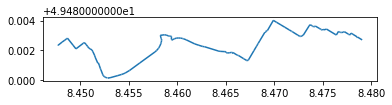

In [9]:
route.plot()
mpl.display()

In [10]:
route.distance

3070.4

In [11]:
route.green_exposure

36.03826987590789

In [12]:
route.duration

2210.7

#### Save to file

In [13]:
route.to_file("./test_route.geojson")

#### Route geometry

In [14]:
route_geom = route.as_dataframe().unary_union